# Day 4a
## [Three types of Machine Learning](https://towardsdatascience.com/beginners-guide-to-the-three-types-of-machine-learning-3141730ef45d)
## https://towardsdatascience.com/
## by PDK

* Supervised : 1) Classification, 2) Regression
* Unsupervised : 3) Clustering

## Classification

In [23]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [24]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['TARGET'] = pd.Series(wine.target)

In [25]:
X_w = wine_df.drop(['TARGET'], axis=1)
y_w = wine_df['TARGET']
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2)

### 참고 
### Supervised Learning
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [26]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier
    model.fit(X_train_w, y_train_w)  
    y_pred_w = model.predict(X_test_w)
    print(classifier)
    print("model score: %.3f" % f1_score(y_test_w, y_pred_w, average='weighted'))

KNeighborsClassifier(n_neighbors=3)
model score: 0.834
SVC(C=0.025, probability=True)
model score: 0.375
NuSVC(probability=True)
model score: 0.916
DecisionTreeClassifier()
model score: 0.944
RandomForestClassifier()
model score: 1.000
AdaBoostClassifier()
model score: 1.000
GradientBoostingClassifier()
model score: 0.918


In [27]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [28]:
y_w

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: TARGET, Length: 178, dtype: int32

In [29]:
X_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Regression

In [30]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.Series(boston.target)
X_b = boston_df.drop(['TARGET'], axis=1)
y_b = boston_df['TARGET']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

In [32]:
regressors = [
    linear_model.Lasso(alpha=0.1),
    linear_model.LinearRegression(),
    ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0),
    SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False),
    linear_model.Ridge(alpha=.5)                
    ]
for regressor in regressors:
    model = regressor
    model.fit(X_train_b, y_train_b)  
    y_pred_b = model.predict(X_test_b)
    print(regressor)
    print("mean squared error: %.3f" % sqrt(mean_squared_error(y_test_b, y_pred_b)))

Lasso(alpha=0.1)
mean squared error: 4.188
LinearRegression()
mean squared error: 4.079
ElasticNetCV(cv=5, random_state=0)
mean squared error: 4.632
SVR(gamma='auto')
mean squared error: 8.545
Ridge(alpha=0.5)
mean squared error: 4.075


In [33]:
regressors = [
    linear_model.Lasso(alpha=0.1),
    linear_model.LinearRegression(),
    ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0),
    SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False),
    linear_model.Ridge(alpha=.5)                
    ]
for regressor in regressors:
    model = regressor
    model.fit(X_train_b, y_train_b)  
    y_pred_b = model.predict(X_test_b)
    print(regressor)
    print("mean squared error: %.3f" % sqrt(mean_squared_error(y_test_b, y_pred_b)))

Lasso(alpha=0.1)
mean squared error: 4.188
LinearRegression()
mean squared error: 4.079
ElasticNetCV(cv=5, random_state=0)
mean squared error: 4.632
SVR()
mean squared error: 7.583
Ridge(alpha=0.5)
mean squared error: 4.075


## Unsupervised learning

In [45]:
np.random.seed(0)
msk = np.random.rand(len(X_w)) < 0.8
train_w = X_w[msk]
test_w = X_w[~msk]

In [46]:
# 일종의 Normalization
x = train_w.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled,columns=train_w.columns)

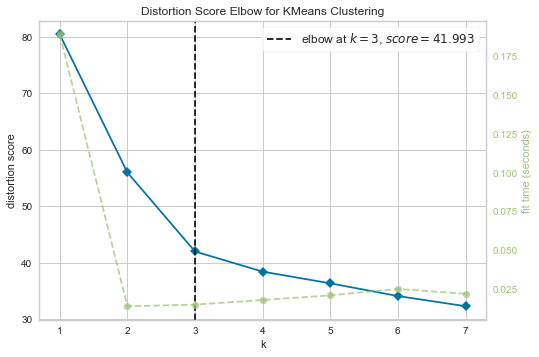

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X_scaled)       
visualizer.show()

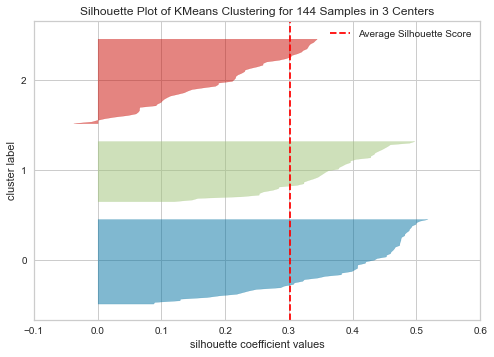

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 144 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)      
visualizer.show()